In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [158]:
NASA = pd.read_csv('/content/drive/MyDrive/sampled_NASA_200k.csv')

In [35]:
print("Lon Range:", NASA['lon'].min(), NASA['lon'].max())
print("Lat Range:", NASA['lat'].min(), NASA['lat'].max())

Lon Range: -124.9375 -67.0625
Lat Range: 25.0625 52.9375


In [159]:
# Wybranie ciepłych miesięcy, aby otrzymać realny obraz występującej roślinności
NASA['Date'] = NASA['Date'].astype(str)
NASA_lato = NASA[NASA['Date'].str[-2:].isin(["05", "06", "07", "08", "09", "10"])]

In [160]:
# Kolumny, które mogą mieć największy wpływ na pustynnienie (wg ustaleń Mariusza po przeprowadzonym researchu)
selected_columns = ["lon", "lat", "Rainf", "Evap", "AvgSurfT", "Albedo", "SoilT_40_100cm", "GVEG"]
NASA_lato = NASA_lato[selected_columns].dropna()

In [ ]:
NASA_lato.head(5)

,lon,lat,Rainf,Evap,AvgSurfT,Albedo,SoilT_40_100cm,GVEG
0,-119.0625,42.4375,22.0672,7.629402,280.2746,40.87769,283.7812,0.030827
3,-74.1875,40.9375,125.9735,34.582930,288.0775,24.00672,284.2830,0.575912
4,-94.1875,30.0625,284.3076,132.679000,299.5116,24.61111,295.5570,0.615523
5,-117.0625,32.9375,1.4660,32.135890,295.4950,22.64583,290.7068,0.300523
7,-85.0625,43.4375,58.6264,83.969650,292.4481,24.78056,284.8408,0.737928


# CD - Chihuahuan Desert
# CP - Colorado Plateau
# GBD - Great Basin Desert

In [161]:
# Obszary pustynne
CD = NASA_lato[(NASA_lato['lon'] >= -104) & (NASA_lato['lon'] <= -102) & (NASA_lato['lat'] >= 30) & (NASA_lato['lat'] <= 31)]
CP = NASA_lato[(NASA_lato['lon'] >= -110.5) & (NASA_lato['lon'] <= -108.5) & (NASA_lato['lat'] >= 39) & (NASA_lato['lat'] <= 40.5)]
GBD = NASA_lato[(NASA_lato['lon'] >= -116) & (NASA_lato['lon'] <= -114) & (NASA_lato['lat'] >= 40) & (NASA_lato['lat'] <= 41.5)]

In [162]:
# Obszary pustynno - niepustynne
CD_i_niepustynia = NASA_lato[(NASA_lato['lon'] >= -106.5) & (NASA_lato['lon'] <= -104.5) & (NASA_lato['lat'] >= 32.5) & (NASA_lato['lat'] <= 33.5)]
CP_i_niepustynia = NASA_lato[(NASA_lato['lon'] >= -109) & (NASA_lato['lon'] <= -107) & (NASA_lato['lat'] >= 37.5) & (NASA_lato['lat'] <= 39)]
GBD_i_niepustynia = NASA_lato[(NASA_lato['lon'] >= -115) & (NASA_lato['lon'] <= -113) & (NASA_lato['lat'] >= 42.5) & (NASA_lato['lat'] <= 44)]

In [163]:
# Obszary niepustynne
niepustynia_przy_CD = NASA_lato[(NASA_lato['lon'] >= -109.5) & (NASA_lato['lon'] <= -107.5) & (NASA_lato['lat'] >= 33) & (NASA_lato['lat'] <= 34)]
niepustynia_przy_CP = NASA_lato[(NASA_lato['lon'] >= -107) & (NASA_lato['lon'] <= -105) & (NASA_lato['lat'] >= 39) & (NASA_lato['lat'] <= 40.5)]
niepustynia_przy_GBD = NASA_lato[(NASA_lato['lon'] >= -124) & (NASA_lato['lon'] <= -122) & (NASA_lato['lat'] >= 39.5) & (NASA_lato['lat'] <= 41)]

# Wizualizacje + wstępne ustalenia parametrów

In [164]:
def plot_histogram(ax, data, column, title, color):
    ax.hist(data[column], bins=20, color=color, edgecolor="black")
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_xlim(min(min(CD[column]), min(CD_i_niepustynia[column]), min(niepustynia_przy_CD[column]),
                    min(CP[column]), min(CP_i_niepustynia[column]), min(niepustynia_przy_CP[column]),
                    min(GBD[column]), min(GBD_i_niepustynia[column]), min(niepustynia_przy_GBD[column])),
                max(max(CD[column]), max(CD_i_niepustynia[column]), max(niepustynia_przy_CD[column]),
                    max(CP[column]), max(CP_i_niepustynia[column]), max(niepustynia_przy_CP[column]),
                    max(GBD[column]), max(GBD_i_niepustynia[column]), max(niepustynia_przy_GBD[column])))

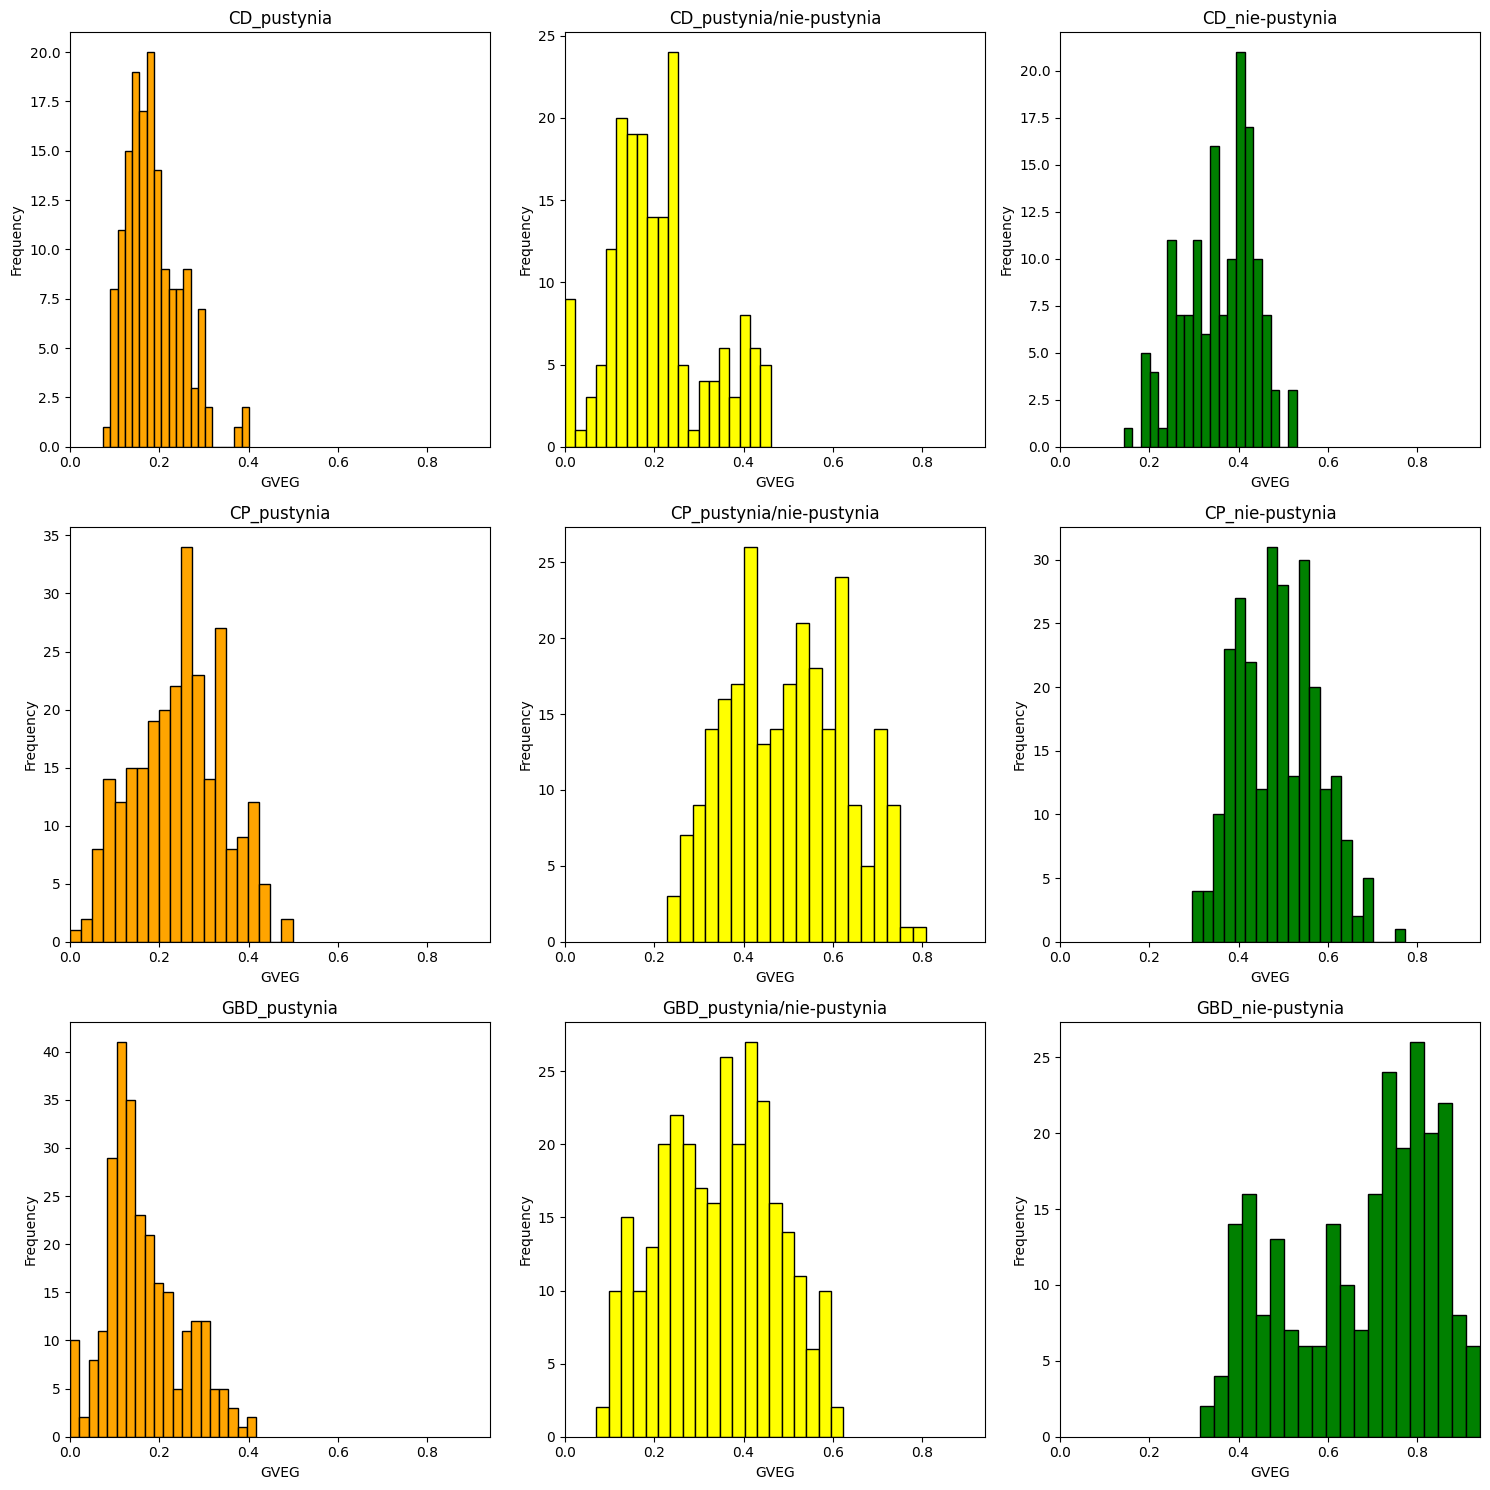

In [212]:
# GVEG (wskaźnik roślinności)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'GVEG', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'GVEG', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'GVEG', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'GVEG', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'GVEG', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'GVEG', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'GVEG', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'GVEG', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'GVEG', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [165]:
first_quartiles_GVEG = (niepustynia_przy_CD['GVEG'].quantile(0.25), niepustynia_przy_CP['GVEG'].quantile(0.25), niepustynia_przy_GBD['GVEG'].quantile(0.25))

In [166]:
print("first_quartiles:", first_quartiles_GVEG)

first_quartiles: (0.298891372410774, 0.4144948, 0.528550425)


In [167]:
third_quartiles_GVEG = (CD['GVEG'].quantile(0.75), CP['GVEG'].quantile(0.75), GBD['GVEG'].quantile(0.75))

In [168]:
print("third_quartiles:", third_quartiles_GVEG)

third_quartiles: (0.22247999999999998, 0.32220407500000003, 0.209528109185982)


In [169]:
GVEG_graniczne = round(
    pd.Series([
        CD['GVEG'].quantile(0.75),
        niepustynia_przy_CD['GVEG'].quantile(0.25),
        CP['GVEG'].quantile(0.75),
        niepustynia_przy_CP['GVEG'].quantile(0.25),
        GBD['GVEG'].quantile(0.75),
        niepustynia_przy_GBD['GVEG'].quantile(0.25),
    ]).mean(), 3
)


In [170]:
print("GVEG_graniczne:", GVEG_graniczne)

GVEG_graniczne: 0.333


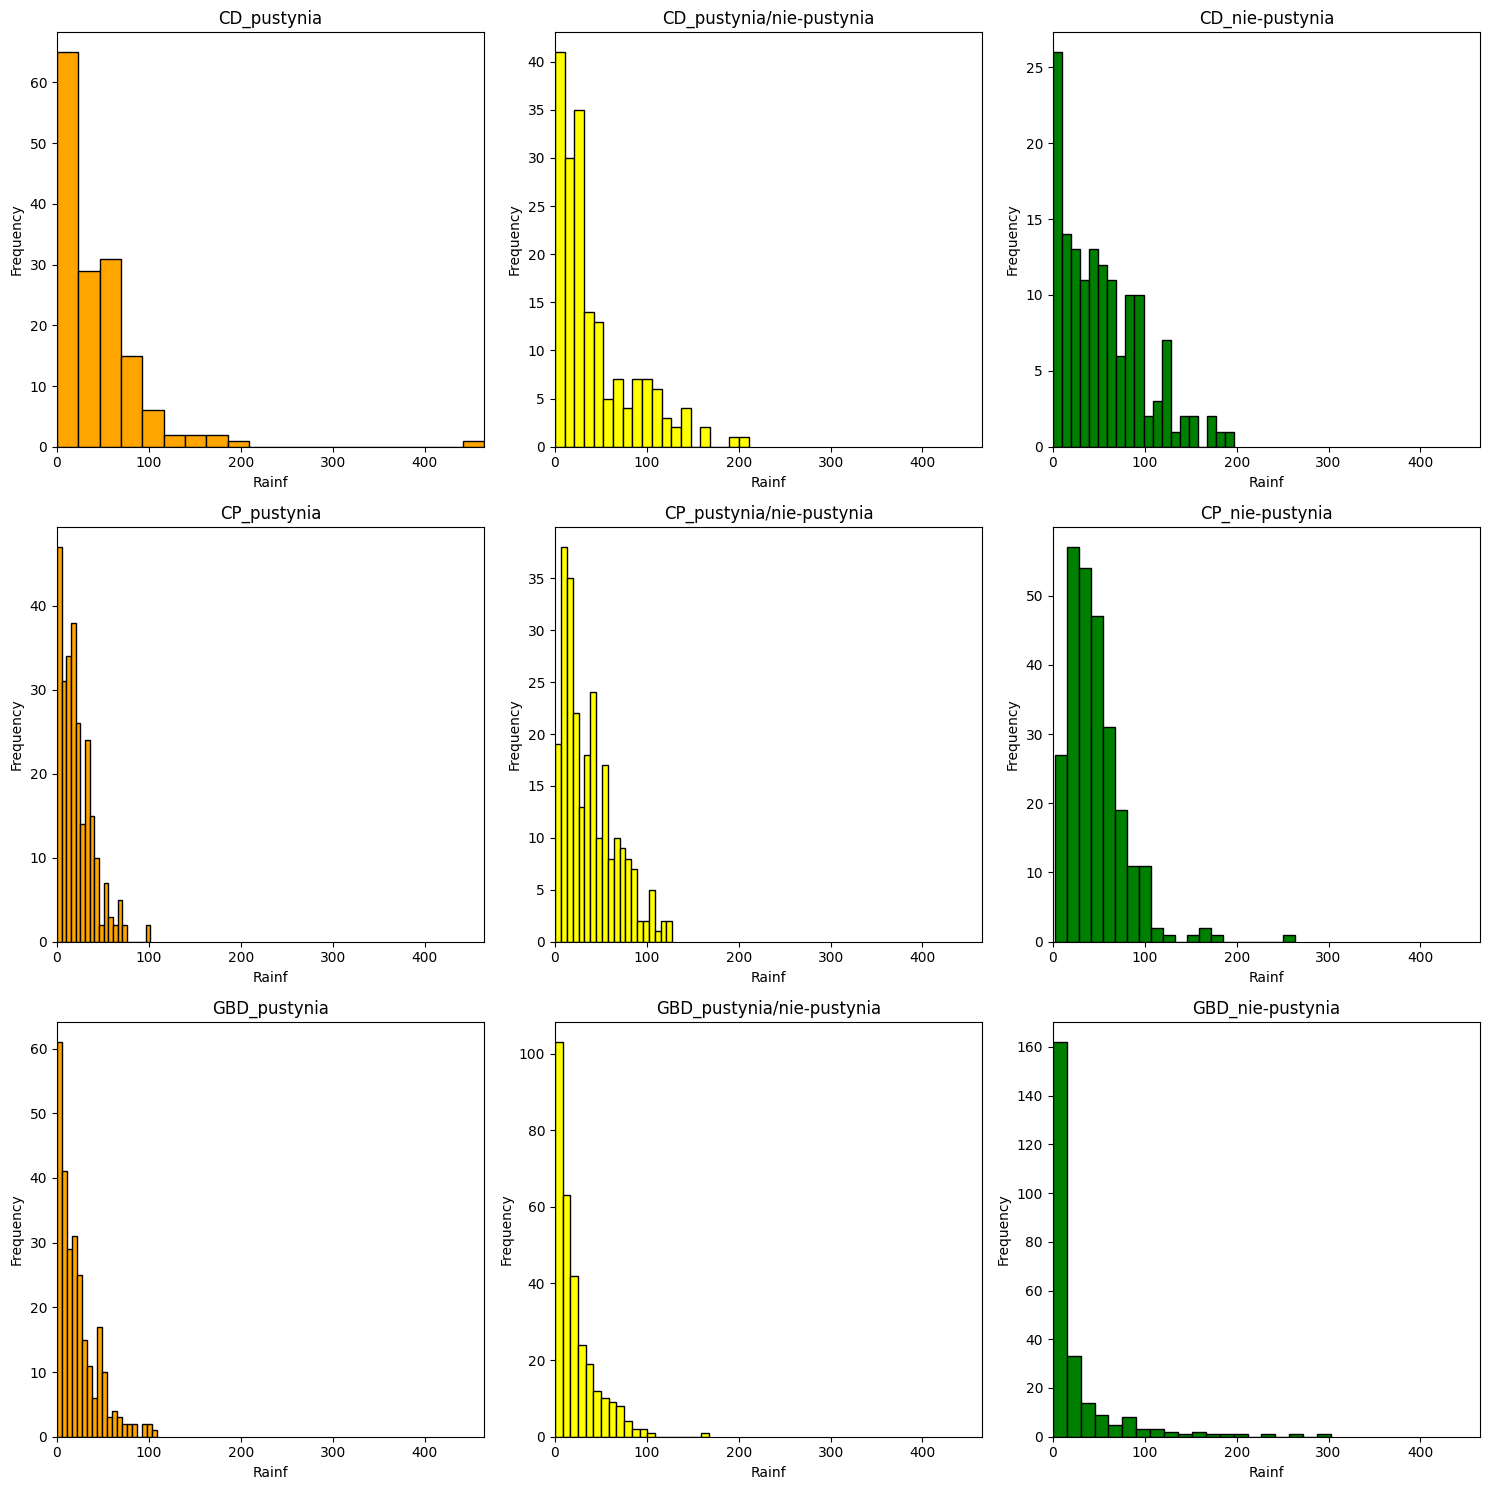

In [211]:
# Rainf (wskaźnik opadów deszczu)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'Rainf', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'Rainf', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'Rainf', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'Rainf', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'Rainf', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'Rainf', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'Rainf', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'Rainf', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'Rainf', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [171]:
first_quartiles_Rainf = (CD_i_niepustynia['Rainf'].quantile(0.25), CP_i_niepustynia['Rainf'].quantile(0.25), GBD_i_niepustynia['Rainf'].quantile(0.25))

In [172]:
print("first_quartiles:", first_quartiles_Rainf)

first_quartiles: (12.751949999999999, 14.59955, 6.1601761930770875)


In [173]:
third_quartiles_Rainf = (CD_i_niepustynia['Rainf'].quantile(0.75), CP_i_niepustynia['Rainf'].quantile(0.75), GBD_i_niepustynia['Rainf'].quantile(0.75))

In [174]:
print("third_quartiles:", third_quartiles_Rainf)

third_quartiles: (61.49929618835445, 54.8589675, 30.6363925)


In [175]:
Rainf_graniczne = round(
    pd.Series([
        CD_i_niepustynia['Rainf'].quantile(0.75),
        CD_i_niepustynia['Rainf'].quantile(0.25),
        CP_i_niepustynia['Rainf'].quantile(0.75),
        CP_i_niepustynia['Rainf'].quantile(0.25),
        GBD_i_niepustynia['Rainf'].quantile(0.75),
        GBD_i_niepustynia['Rainf'].quantile(0.25),
    ]).mean()
)

In [176]:
print("Rainf_graniczne:", Rainf_graniczne)

Rainf_graniczne: 30


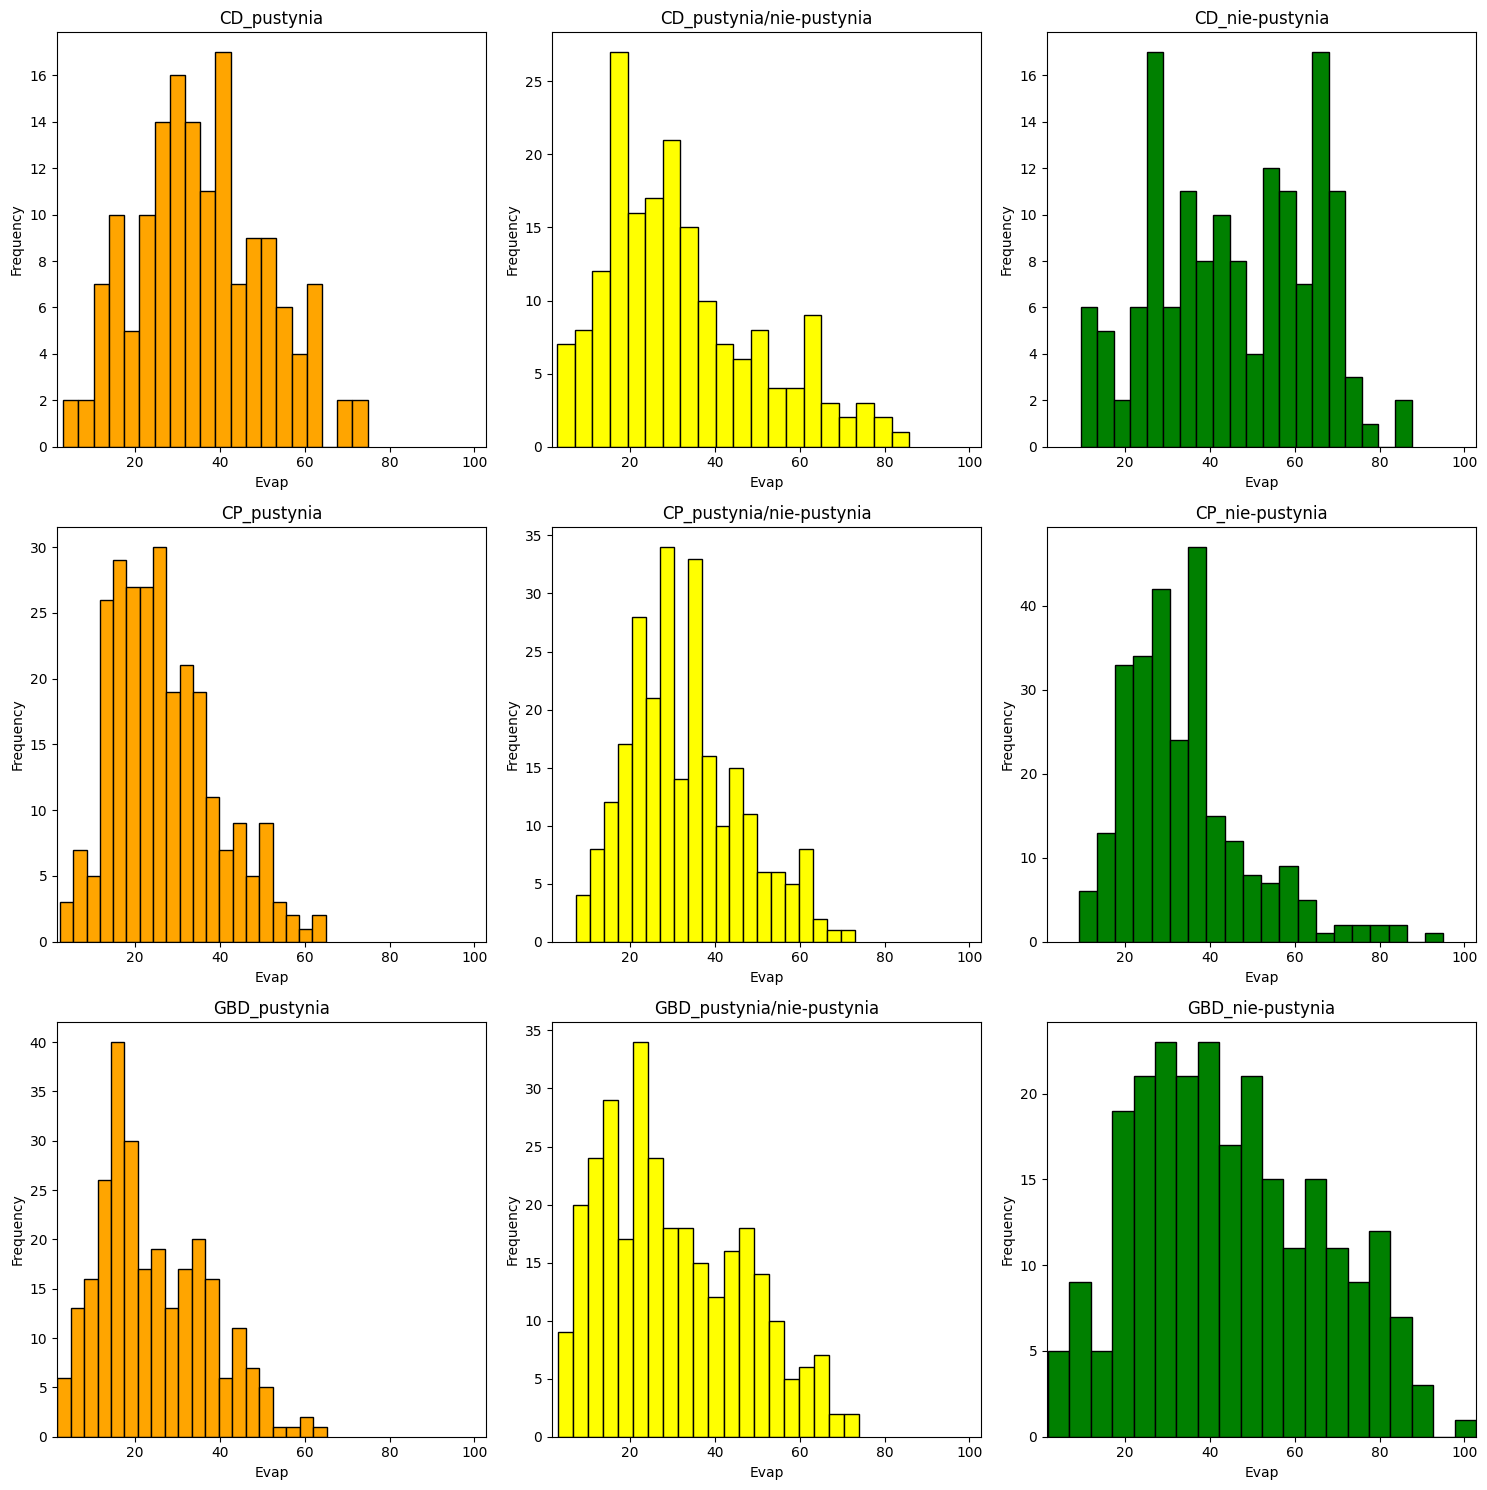

In [210]:
# Evap (wskaźnik całkowitej ewapotranspiracji)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'Evap', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'Evap', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'Evap', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'Evap', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'Evap', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'Evap', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'Evap', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'Evap', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'Evap', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [177]:
first_quartiles_Evap = (niepustynia_przy_CD['Evap'].quantile(0.25), niepustynia_przy_CP['Evap'].quantile(0.25), niepustynia_przy_GBD['Evap'].quantile(0.25))

In [178]:
print("first_quartiles:", first_quartiles_Evap)

first_quartiles: (29.36925, 24.3485, 28.204462499999998)


In [179]:
third_quartiles_Evap = (CD['Evap'].quantile(0.75), CP['Evap'].quantile(0.75), GBD['Evap'].quantile(0.75))

In [180]:
print("third_quartiles:", third_quartiles_Evap)

third_quartiles: (46.52422, 34.1840525, 33.974339035034205)


In [181]:
Evap_graniczne = round(
    pd.Series([
        CD['Evap'].quantile(0.75),
        niepustynia_przy_CD['Evap'].quantile(0.25),
        CP['Evap'].quantile(0.75),
        niepustynia_przy_CP['Evap'].quantile(0.25),
        GBD['Evap'].quantile(0.75),
        niepustynia_przy_GBD['Evap'].quantile(0.25),
    ]).mean()
)

In [182]:
print("Evap_graniczne:", Evap_graniczne)

Evap_graniczne: 33


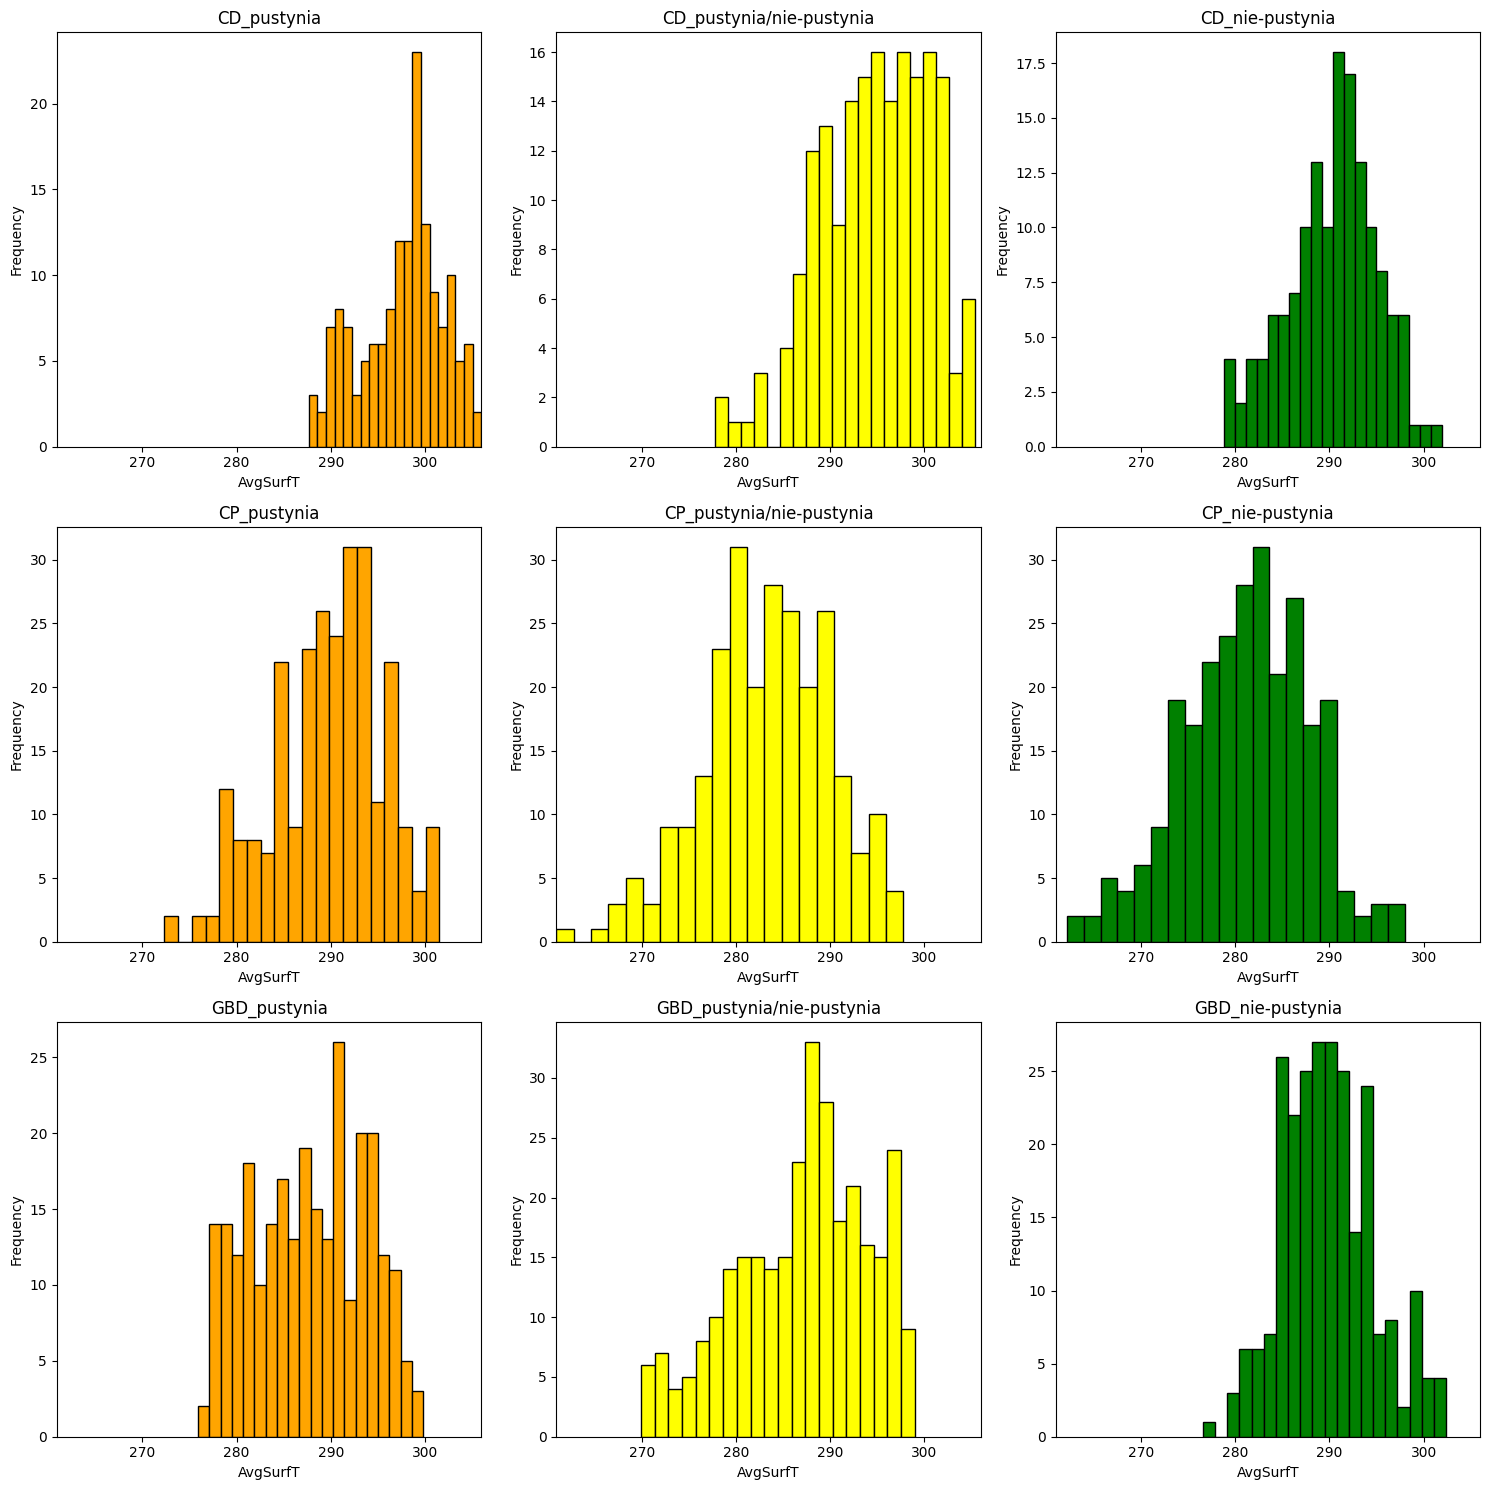

In [209]:
# AvgSurfT (wskaźnik średniej temperatury powierzchni ziemi)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'AvgSurfT', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'AvgSurfT', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'AvgSurfT', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'AvgSurfT', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'AvgSurfT', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'AvgSurfT', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'AvgSurfT', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'AvgSurfT', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'AvgSurfT', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [183]:
first_quartiles_AvgSurfT = (CD['AvgSurfT'].quantile(0.25), CP['AvgSurfT'].quantile(0.25), GBD['AvgSurfT'].quantile(0.25))

In [184]:
print("first_quartiles:", first_quartiles_AvgSurfT)

first_quartiles: (294.56427499999995, 285.8946, 282.8953)


In [185]:
third_quartiles_AvgSurfT = (niepustynia_przy_CD['AvgSurfT'].quantile(0.75), niepustynia_przy_CP['AvgSurfT'].quantile(0.75), niepustynia_przy_GBD['AvgSurfT'].quantile(0.75))

In [186]:
print("third_quartiles:", third_quartiles_AvgSurfT)

third_quartiles: (293.3132, 285.9466, 293.015)


In [187]:
AvgSurfT_graniczne = round(
    pd.Series([
        CD['AvgSurfT'].quantile(0.25),
        niepustynia_przy_CD['AvgSurfT'].quantile(0.75),
        CP['AvgSurfT'].quantile(0.25),
        niepustynia_przy_CP['AvgSurfT'].quantile(0.75),
        GBD['AvgSurfT'].quantile(0.25),
        niepustynia_przy_GBD['AvgSurfT'].quantile(0.75),
    ]).mean()
)

In [188]:
print("AvgSurfT_graniczne:", AvgSurfT_graniczne)

AvgSurfT_graniczne: 289


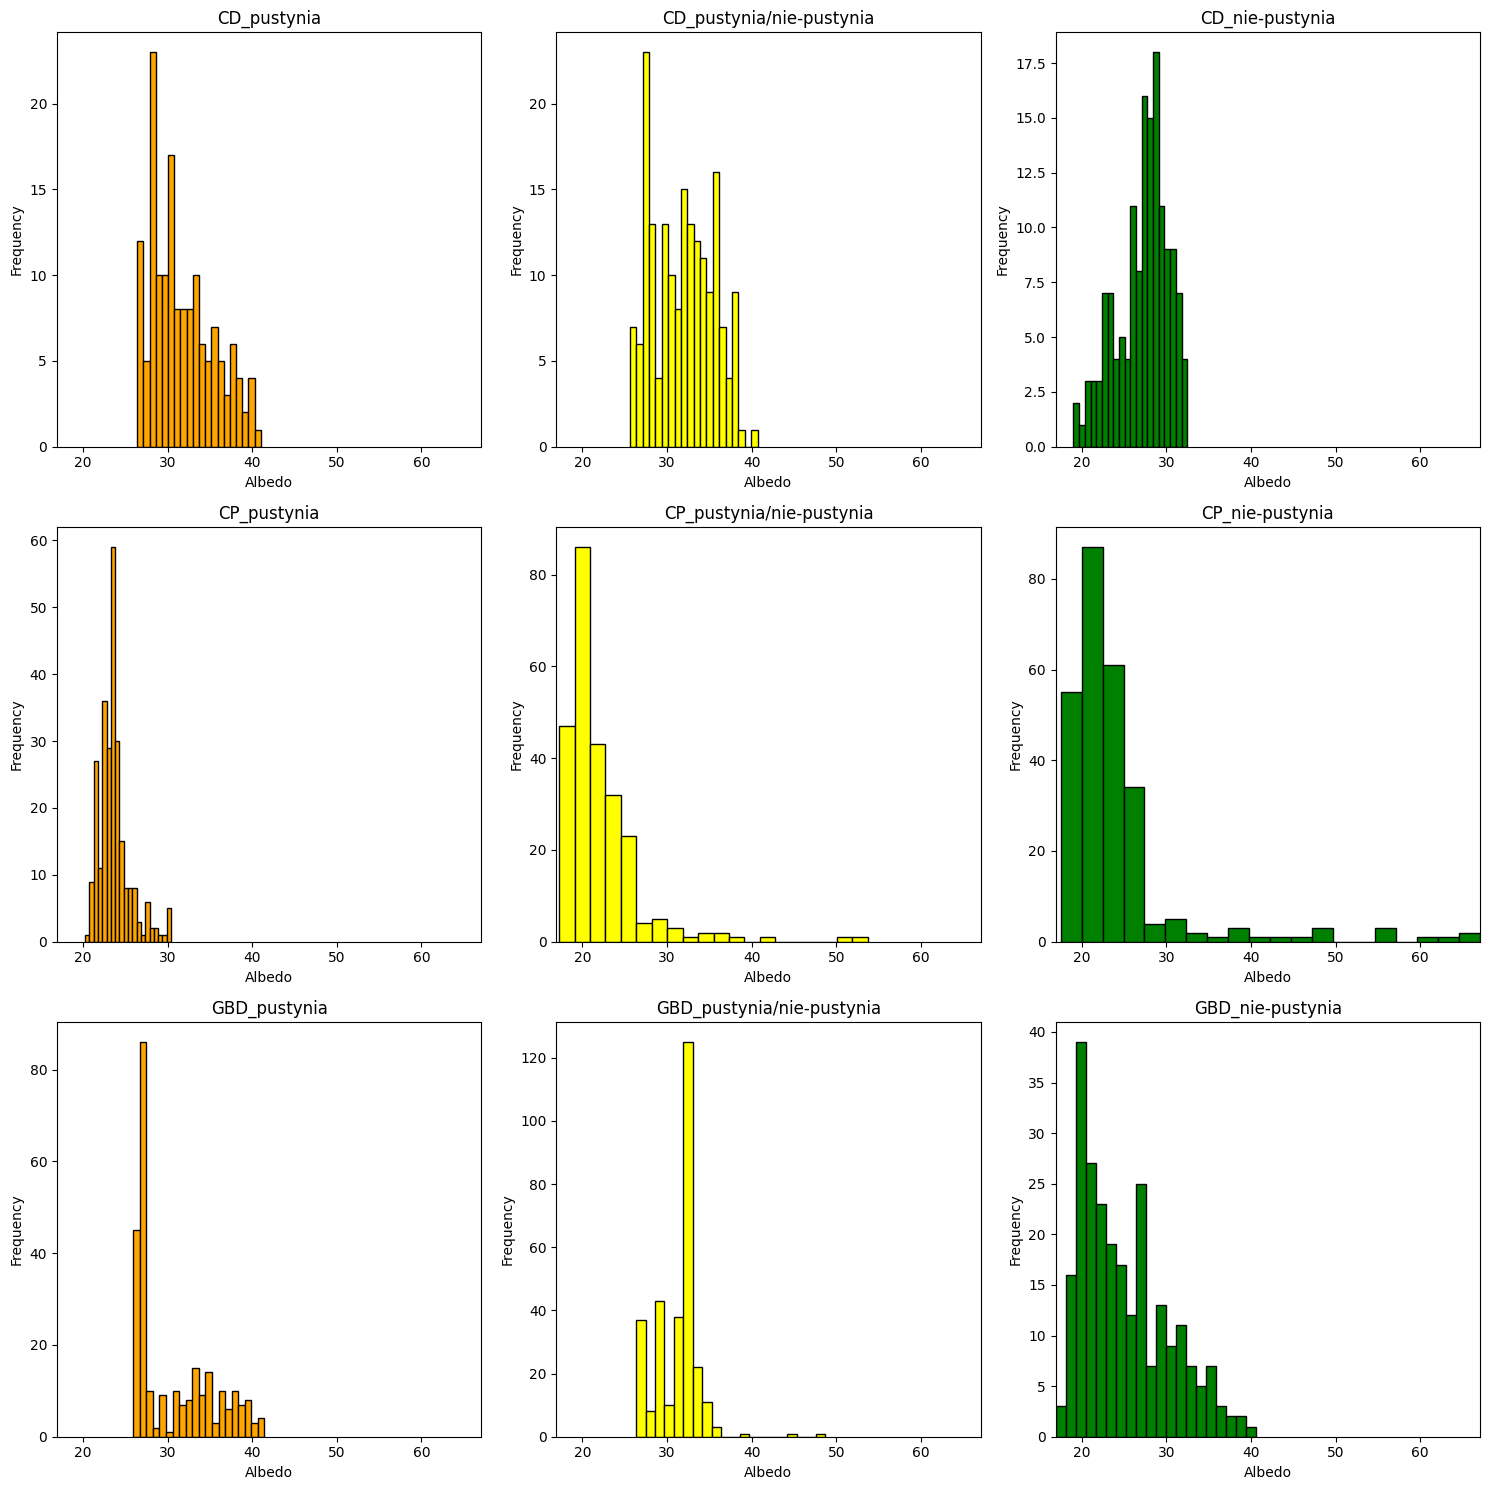

In [208]:
# Albedo (wskaźnik albedo)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'Albedo', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'Albedo', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'Albedo', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'Albedo', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'Albedo', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'Albedo', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'Albedo', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'Albedo', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'Albedo', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [189]:
first_quartiles_Albedo = (CD['Albedo'].quantile(0.25), CP['Albedo'].quantile(0.25), GBD['Albedo'].quantile(0.25))

In [190]:
print("first_quartiles:", first_quartiles_Albedo)

first_quartiles: (28.57743, 22.4277775, 26.913306947937)


In [191]:
third_quartiles_Albedo = (niepustynia_przy_CD['Albedo'].quantile(0.75), niepustynia_przy_CP['Albedo'].quantile(0.75), niepustynia_przy_GBD['Albedo'].quantile(0.75))

In [192]:
print("third_quartiles:", third_quartiles_Albedo)

third_quartiles: (29.27096588043215, 24.77151, 28.126006067504875)


In [193]:
Albedo_graniczne = round(
    pd.Series([
        CD['Albedo'].quantile(0.25),
        niepustynia_przy_CD['Albedo'].quantile(0.75),
        CP['Albedo'].quantile(0.25),
        niepustynia_przy_CP['Albedo'].quantile(0.75),
        GBD['Albedo'].quantile(0.25),
        niepustynia_przy_GBD['Albedo'].quantile(0.75),
    ]).mean(), 1
)

In [194]:
print("Albedo_graniczne:", Albedo_graniczne)

Albedo_graniczne: 26.7


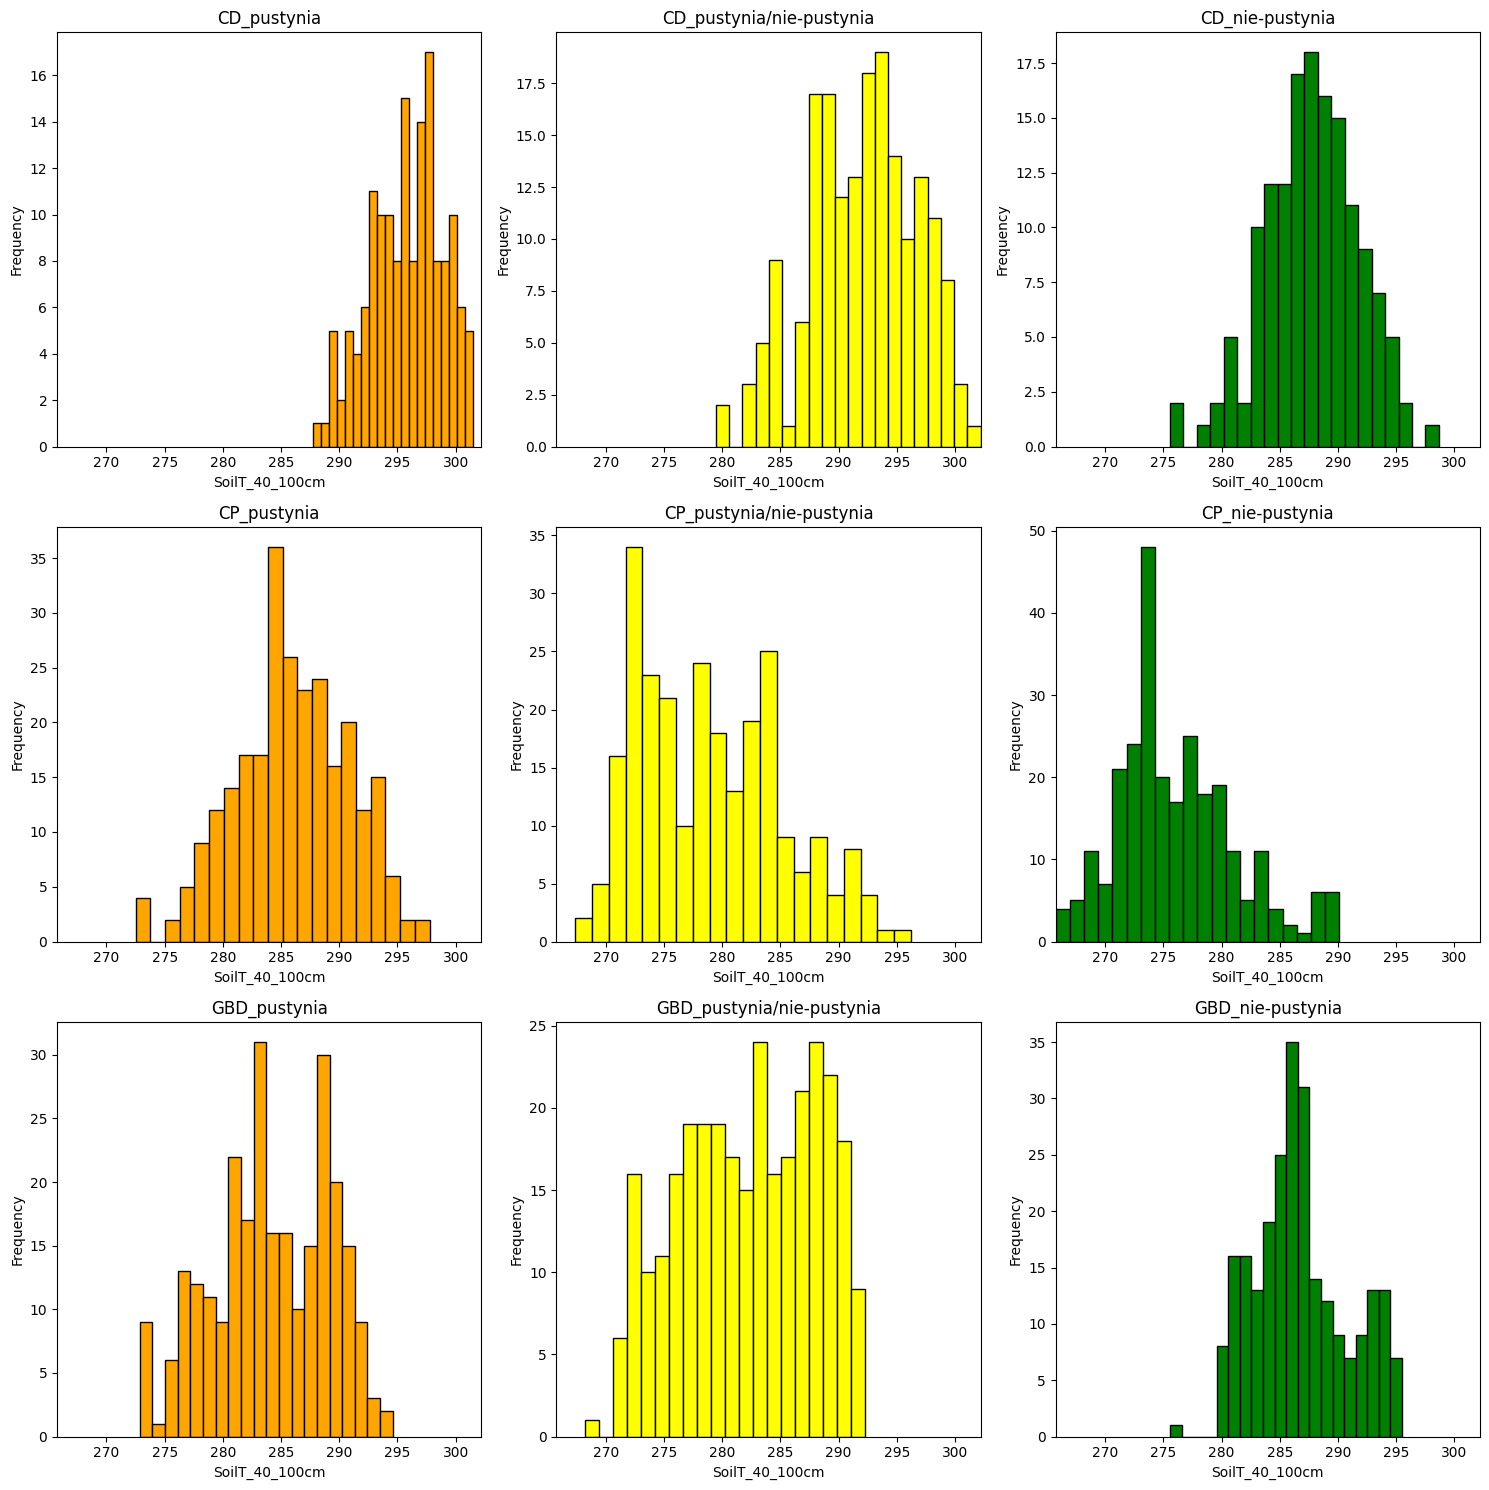

In [207]:
# SoilT_40_100cm (wskaźnik temperatury gleby w warstwie o głębokości od 40 do 100 cm)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'SoilT_40_100cm', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'SoilT_40_100cm', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'SoilT_40_100cm', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'SoilT_40_100cm', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'SoilT_40_100cm', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'SoilT_40_100cm', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'SoilT_40_100cm', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'SoilT_40_100cm', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'SoilT_40_100cm', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [195]:
first_quartiles_SoilT_40_100cm = (CD['SoilT_40_100cm'].quantile(0.25), CP['SoilT_40_100cm'].quantile(0.25), GBD['SoilT_40_100cm'].quantile(0.25))

In [196]:
print("first_quartiles:", first_quartiles_SoilT_40_100cm)

first_quartiles: (293.4520427612305, 282.720325, 280.7877)


In [197]:
third_quartiles_SoilT_40_100cm = (niepustynia_przy_CD['SoilT_40_100cm'].quantile(0.75), niepustynia_przy_CP['SoilT_40_100cm'].quantile(0.75), niepustynia_przy_GBD['SoilT_40_100cm'].quantile(0.75))

In [198]:
print("third_quartiles:", third_quartiles_SoilT_40_100cm)

third_quartiles: (290.53845, 278.9489, 289.04454999999996)


In [199]:
SoilT_40_100cm_graniczne = round(
    pd.Series([
        CD['SoilT_40_100cm'].quantile(0.25),
        niepustynia_przy_CD['SoilT_40_100cm'].quantile(0.75),
        CP['SoilT_40_100cm'].quantile(0.25),
        niepustynia_przy_CP['SoilT_40_100cm'].quantile(0.75),
        GBD['SoilT_40_100cm'].quantile(0.25),
        niepustynia_przy_GBD['SoilT_40_100cm'].quantile(0.75),
    ]).mean()
)

In [200]:
print("SoilT_40_100cm_graniczne:", SoilT_40_100cm_graniczne)

SoilT_40_100cm_graniczne: 286


# Klasyfikacja: pustynia / nie-pustynia

In [201]:
NASA = NASA[['lon', 'lat', 'Rainf', 'Evap', 'AvgSurfT', 'Albedo', 'SoilT_40_100cm', 'GVEG']].dropna()
NASA['klasyfikacja'] = np.nan

In [202]:
def classify(row: pd.DataFrame):
    conditions = [
        row['Rainf'] <= Rainf_graniczne,
        row['Evap'] <= Evap_graniczne,
        row['GVEG'] <= GVEG_graniczne,
        row['AvgSurfT'] >= AvgSurfT_graniczne,
        row['Albedo'] >= Albedo_graniczne,
        row['SoilT_40_100cm'] >= SoilT_40_100cm_graniczne
    ]
    if np.nansum(conditions) >= 4:
        return "pustynia"
    else:
        return "nie-pustynia"

In [203]:
NASA['klasyfikacja'] = NASA.apply(classify, axis=1)

In [204]:
NASA.head(10)

,lon,lat,Rainf,Evap,AvgSurfT,Albedo,SoilT_40_100cm,GVEG,klasyfikacja
0,-119.0625,42.4375,22.067200,7.629402,280.274600,40.877690,283.781200,0.030827,pustynia
1,-91.6875,42.6875,56.069500,8.200099,271.731000,31.644440,279.603400,0.230389,nie-pustynia
2,-116.0625,50.3125,60.361220,0.511899,265.515700,65.425000,272.894700,0.203754,nie-pustynia
3,-74.1875,40.9375,125.973500,34.582930,288.077500,24.006720,284.283000,0.575912,nie-pustynia
4,-94.1875,30.0625,284.307600,132.679000,299.511600,24.611110,295.557000,0.615523,nie-pustynia
5,-117.0625,32.9375,1.466000,32.135890,295.495000,22.645830,290.706800,0.300523,pustynia
6,-112.0625,29.4375,0.000000,4.702000,294.737600,43.720830,292.038100,0.061700,pustynia
7,-85.0625,43.4375,58.626400,83.969650,292.448100,24.780560,284.840800,0.737928,nie-pustynia
8,-79.0625,36.1875,116.866585,103.839783,297.019257,24.379168,289.425293,0.779222,nie-pustynia
9,-102.4375,41.6875,26.514110,18.310310,277.460000,33.158600,282.275000,0.221730,pustynia


In [213]:
pustynia_percentage = (NASA['klasyfikacja'] == "pustynia").sum() / len(NASA)

In [214]:
print("pustynia_percentage:", pustynia_percentage)

pustynia_percentage: 0.35782139007945457
